# Работа с табличными данными в Pandas, контролько качества данных, базовый EDA и визуализация Matplotlib #

В данном задании 

### Загрузка данных и первичный осмотр ###

In [2]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# загрузка датасета
df = pd.read_csv("S02-hw-dataset.csv")

In [5]:
# вывод первых 5 строк
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [6]:
# вывод информации о стобцах и типах
df.info()

# у нас есть 5 столбцов,  в одном из которых есть null-значения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [7]:
# вывод базовых статистик
df.describe()

# вывод количества значений, среднего, стандартного отклонения, минимума и максимума, значения в квартилях

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


### Пропуски, дубликаты и базовый контроль качества ###

In [9]:
# доля пропусков в каждом столбце
df.isna().mean()

#мы видим, что пропуски есть только в столбце age

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [12]:
# проверка на наличие дублирующих строк
df.duplicated()

# 40 строка дублирует 9, как дубликат помечаются только повторения

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

In [15]:
# поиск отрицательных значений
neg = df[(df['age'] < 0) | (df['purchases'] < 0) | (df['revenue'] < 0)]
neg

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


Мы видим только одну подозрительную строчку с отрицательной покупкой

In [18]:
# нереалистичный возраст
strange_age = df[(df['age'] <= 0) | (df['age'] > 110)]
strange_age

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


В целом, 120 лет - возможный возраст, но в целом это нестрандартное значение для датасета

In [27]:
# нарушение взаимосвязи между выручкой и покупками
zero_rev = df[(df['purchases'] > 0) & (df['revenue'] == 0)]
zero_pur = df[(df['revenue'] > 0) & (df['purchases'] == 0)]
if not zero_rev.empty:
    print("Покупки есть, выручки нет")
    print(zero_rev)
if not zero_pur.empty:
    print("Выручка есть, покупок нет")
    print(zero_pur)

Покупки есть, выручки нет
    user_id   age country  purchases  revenue
10       11  24.0      US          4        0


Видим, что есть только одна строка с покупками, но без выручки

In [30]:
high_rev_low_purch = df[(df['revenue'] > 2000) & (df['purchases'] <= 3)]
if not high_rev_low_purch.empty:
    print("Высокая выручка при малом количестве покупок")
    print(high_rev_low_purch)
low_rev_high_purch = df[(df['purchases'] >= 5) & (df['revenue'] < 10)]
if not low_rev_high_purch.empty:
    print("Большое количество покупок при низкой выручке")
    print(low_rev_high_purch)

Таких нарушений не наблюдается

###  Базовый EDA: группировки, агрегаты и частоты ###

In [31]:
# частота для категориальной переменной
print("Частота пользователей по странам:")
print(df['country'].value_counts())

Частота пользователей по странам:
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


Мы видим, что больше всего пользователей находится в России, а меньше всего в Китае

In [32]:
# группировка по странам
group_country = df.groupby('country').agg(
    avg_purchases=('purchases', 'mean'),
    avg_revenue=('revenue', 'mean'),
    total_revenue=('revenue', 'sum')
).round(2)
print("Статистика по странам:")
print(group_country)

Статистика по странам:
         avg_purchases  avg_revenue  total_revenue
country                                           
CN                4.50      1054.00           2108
DE                6.50      1445.50           8673
FR                4.25       675.92           8111
RU                4.77       790.08          10271
US                4.62       557.38           4459


Германия лидирует по среднему чеку на пользователя, а Россия лидирует по общей выручке благодаря большому количеству пользователей.
Китай имеет мало клиентов, при этом имеет высокий средний чек.
США имеет низкую среднюю выручку, это может происходить из-за низких цен или менее лояльных пользователей.

In [34]:
# Создание bins

# сначала создаем возрастные группы
df['group_age'] = pd.cut(df['age'], bins=[0, 18, 35, 60, 100], labels=['0-18', '19-35', '36-60', '61-100'])

# далее группируем по возрасту
stats_age = df.groupby('group_age', dropna=True).agg(
    users=('user_id', 'count'),
    avg_revenue=('revenue', 'mean')
).round(2)
print("Статистика по возрастным группам")
print(stats_age)

Статистика по возрастным группам
           users  avg_revenue
group_age                    
0-18           2      1296.00
19-35         21       772.90
36-60         15       805.87
61-100         0          NaN


C:\Users\kuzne\AppData\Local\Temp\ipykernel_3008\3955833747.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_age = df.groupby('group_age', dropna=True).agg(


Большинство пользователей относятся к категории 19-35 лет, а пожилых пользователей совсем нет. 
Самые высокий средний чек имеют самые молодые клиенты, хотя пользователей в этой категории всего 2.

### Визуализация данных ###

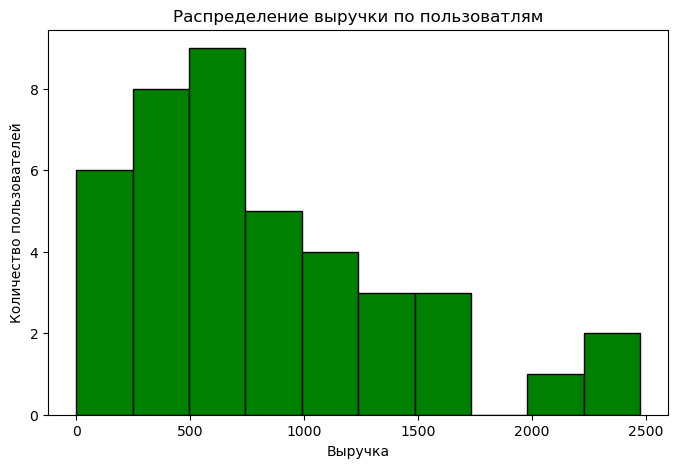

In [13]:
# гисторамма распределения выручки
plt.figure(figsize=(8, 5))  # размер
plt.hist(df['revenue'], bins=10, color='green', edgecolor='black')  # сам график
plt.title('Распределение выручки по пользоватлям')
plt.xlabel('Выручка')
plt.ylabel('Количество пользователей')
plt.savefig('figures/hist_revenue_by_user.png')
plt.show()

Большинство пользователей приносят выручку в диапозоне от 0 до 1500. Небольшое количество пользователей приносит выручку больше 2000. Возможно это богатые vip-клиенты или выбросы в данных.
Распределение скошено вправо

<Figure size 1000x600 with 0 Axes>

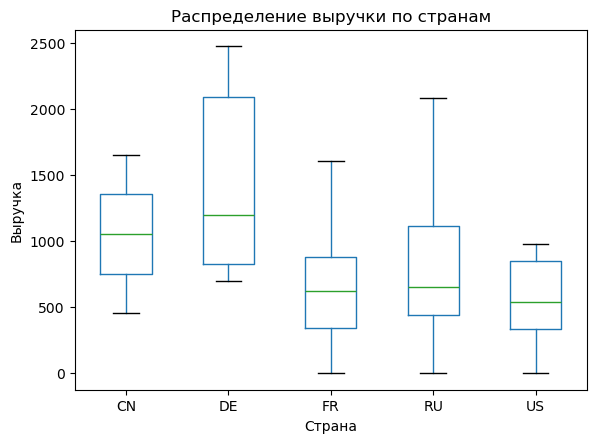

In [14]:
# боксплот выручки по странам

plt.figure(figsize=(10, 6))
df.boxplot(column='revenue', by='country', grid=False)
plt.title('Распределение выручки по странам')
plt.suptitle('')
plt.xlabel('Страна')
plt.ylabel('Выручка')
plt.savefig('figures/boxplot_revenue_by_country.png')
plt.show()

На графике можно посмотреть медиану выручки, выбросы и разброс данных по каждой стране.
Самую высокую медианную выручку имеют пользователи Германии, также они имеют наибольший разброс значений. Самая низкая медиана в США.

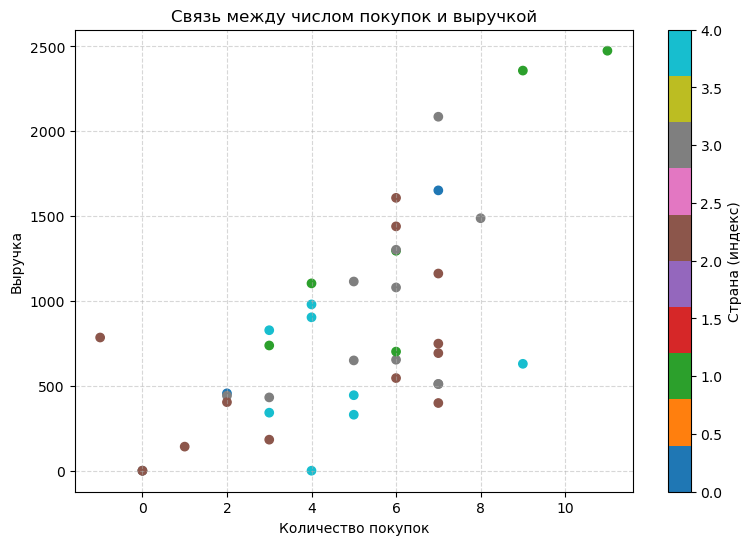

In [15]:
# Диаграмма рассеяния с цветом по стране

plt.figure(figsize=(9, 6))
scatter = plt.scatter(df['purchases'], df['revenue'], c=pd.Categorical(df['country']).codes, cmap='tab10')
plt.title('Связь между числом покупок и выручкой')
plt.xlabel('Количество покупок')
plt.ylabel('Выручка')
plt.colorbar(scatter, label='Страна (индекс)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig('figures/purchases_and_revenue.png')
plt.show()

На этом графике показана зависимость выручки от количества покупок

Мы видим, что в основном с увеличением покупок растёт выручка. Есть аномалии - ошибки в данных или особенные товары.
Чаще всего в аномалии встречались в Германии и Китае.

#### Большинство пользователей показывают средние значения по выручке. Германия является лидером по среднему чеку.  ####
#### Есть немногочисленные анаомальные случаи, требующие дополнительного анализа. Графики помогают понять структуру данных. ####